# Analyse descriptive

In [1]:
from Nettoyage import recupere_bases_de_donnees_complete, nettoie_donnees

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 9)

In [5]:
import os

In [6]:
path = os.path.abspath(os.getcwd())

## Récupère données

In [7]:
data = recupere_bases_de_donnees_complete(path + "\Donnees")
data = nettoie_donnees(data)

In [8]:
data.head()

,etat,marque,prix_euro,couleur,taille_ecran_pouce,capacite_stockage_Go,megapixel,systeme_exploitation,resolution_ecran,reseau,date_de_sortie,memoire,connecteur,double_sim,port_carte_SD,pliable,poids_g
0,État correct,apple,201.0,gris sidéral,4.7,64.0,12,iOS,750x1334,4G,2017,2.0,Lightning,Non,Non,Non,148
1,Très bon état,apple,213.0,gris sidéral,4.7,64.0,12,iOS,750x1334,4G,2017,2.0,Lightning,Non,Non,Non,148
2,Parfait état,apple,263.0,gris sidéral,4.7,64.0,12,iOS,750x1334,4G,2017,2.0,Lightning,Non,Non,Non,148
3,État correct,apple,358.0,noir,6.1,64.0,12,iOS,828x1792,4G,2018,3.0,Lightning,Non,Non,Non,194
4,Très bon état,apple,379.0,noir,6.1,64.0,12,iOS,828x1792,4G,2018,3.0,Lightning,Non,Non,Non,194


In [9]:
round(data.describe(), 2)

,prix_euro,taille_ecran_pouce,capacite_stockage_Go,memoire,poids_g
count,2504.00,2504.00,2504.00,2504.00,2504.00
mean,380.56,5.90,130.40,5.06,174.80
std,217.90,0.66,109.41,2.76,27.08
min,39.00,4.00,4.00,0.51,110.00
25%,205.00,5.50,64.00,3.00,155.00
50%,327.00,6.10,128.00,4.00,175.00
75%,519.00,6.40,128.00,6.00,193.00
max,999.00,8.00,512.00,15.00,490.00


In [10]:
data.dtypes

etat                     object
marque                   object
prix_euro               float64
couleur                  object
taille_ecran_pouce      float64
capacite_stockage_Go    float64
megapixel                object
systeme_exploitation     object
resolution_ecran         object
reseau                   object
date_de_sortie           object
memoire                 float64
connecteur               object
double_sim               object
port_carte_SD            object
pliable                  object
poids_g                   int32
dtype: object

Corrélation entre les variables numériques:

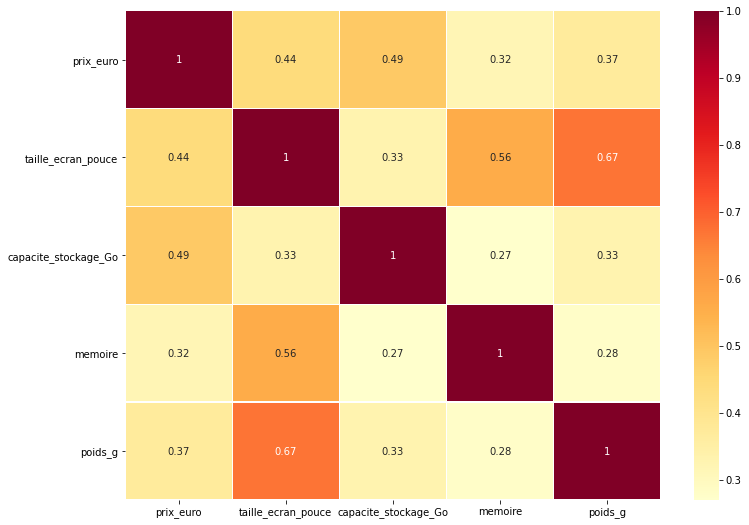

In [11]:
sns.heatmap(round(data.corr(), 2), linewidths=.1, cmap="YlOrRd", annot=True);

Aucune variable n'est corrélée avec une autre. Cependant, nous pouvons observer un coefficient de corrélation de 0.67 entre taille_ecran_pouce et poids_g.

## État

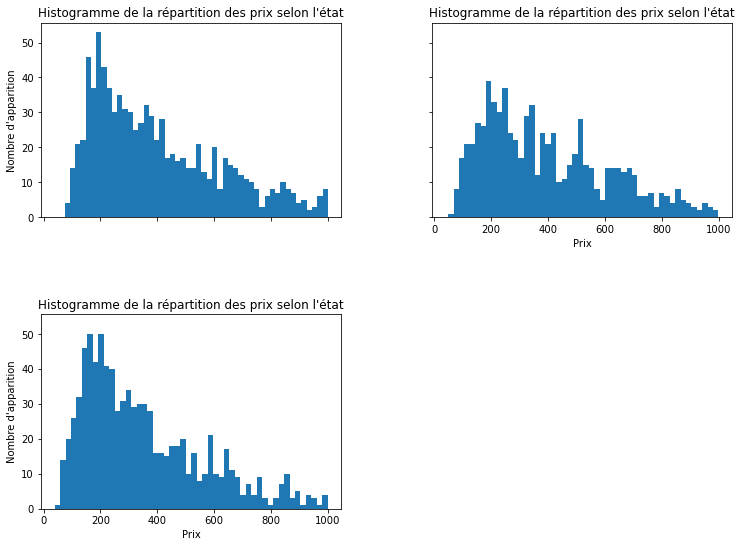

In [12]:
hist_etat = data.hist(
    column="prix_euro", by="etat", 
    bins=50, xrot=0, sharex=True, sharey=True
);
for ax in hist_etat.flatten():
    ax.set_xlabel("Prix")
    ax.set_ylabel("Nombre d'apparition")
    ax.set_title(
        "Histogramme de la répartition des prix selon l'état"
    )

In [13]:
data_etat = data.groupby("etat")
data_etat["prix_euro"].agg([pd.Series.mean, pd.Series.std]).round(2)

,mean,std
etat,,
Parfait état,399.51,222.37
Très bon état,393.67,217.56
État correct,349.65,210.22


Les prix semblent légèrement plus élevés lorsque l'état est parfait. Cependant l'écart-type est également plus grand donc il y a de fortes chances que les smartphones en état parfait et en très bon état aient des prix pas significativement différents.

## Marque

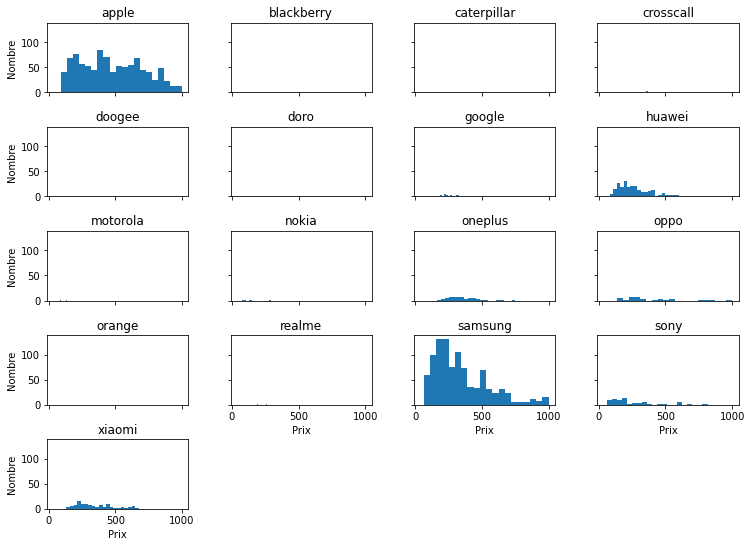

In [14]:
hist_marque = data.hist(
    column="prix_euro", by="marque", 
    bins=20, xrot=0, sharex=True, sharey=True
);
for ax in hist_marque.flatten():
    ax.set_xlabel("Prix")
    ax.set_ylabel("Nombre")

In [15]:
data_marque = data.groupby("marque")
data_marque["prix_euro"].agg([pd.Series.mean, pd.Series.std]).round(2)

,mean,std
marque,,
apple,475.99,230.56
blackberry,77.00,4.24
caterpillar,176.50,14.85
crosscall,319.00,93.93
doogee,259.00,NaN
doro,129.00,NaN
google,280.51,84.16
huawei,257.82,111.61
motorola,130.90,26.44


Apple a une moyenne de prix plus élevé mais également l'écart-type le plus élevé.

## Prix

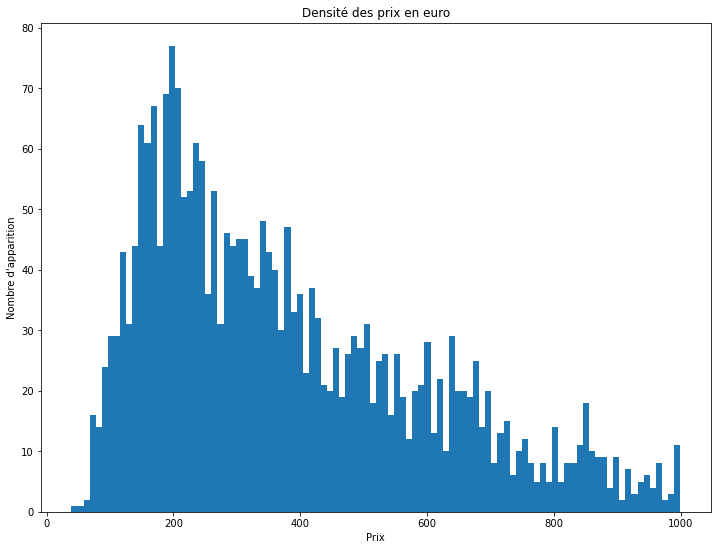

In [16]:
prix_plot = data.hist(column="prix_euro", bins=100, xrot=0, grid=False);
for ax in prix_plot.flatten():
    ax.set_xlabel("Prix")
    ax.set_ylabel("Nombre d'apparition")
    ax.set_title("Densité des prix en euro")

In [17]:
round(data["prix_euro"].describe(), 2)

count    2504.00
mean      380.56
std       217.90
min        39.00
25%       205.00
50%       327.00
75%       519.00
max       999.00
Name: prix_euro, dtype: float64

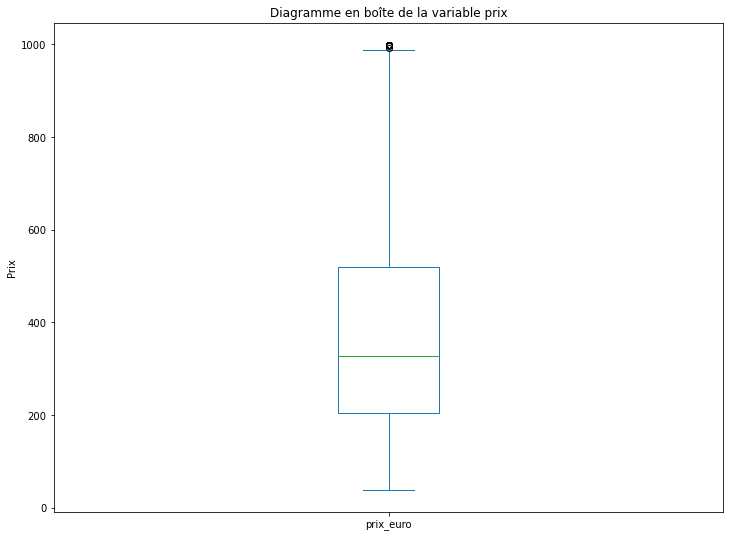

In [18]:
prix_plot_2 = data.plot.box(y=["prix_euro"])
prix_plot_2.set_ylabel("Prix")
prix_plot_2.set_title("Diagramme en boîte de la variable prix");

La moitié des smartphones ont un prix inférieur à 327 euros et seulement 25% des smartphones ont un prix supérieur à 519 euros.

## Couleur

In [19]:
data_couleur = data.groupby("couleur")
tableau_couleur = data_couleur["prix_euro"].agg([pd.Series.mean, pd.Series.std]).round(2)
tableau_couleur.sort_values(by=["mean"], ascending=False).iloc[1:10,:]

,mean,std
couleur,,
beige,869.63,26.12
phantom black,836.29,297.00
midgnight black,742.23,36.29
graphite,735.18,347.12
vert nuit,732.46,88.09
bleu pacifique,645.39,382.46
mauve,631.63,121.44
bleu horizon,610.60,26.75
gris cosmique,595.94,79.00


Les couleurs qui sembleraient être les plus chères sont le beige, le midnight black et le phantom black.

## Taille de l'écran

In [20]:
round(data["taille_ecran_pouce"].describe(), 2)

count    2504.00
mean        5.90
std         0.66
min         4.00
25%         5.50
50%         6.10
75%         6.40
max         8.00
Name: taille_ecran_pouce, dtype: float64

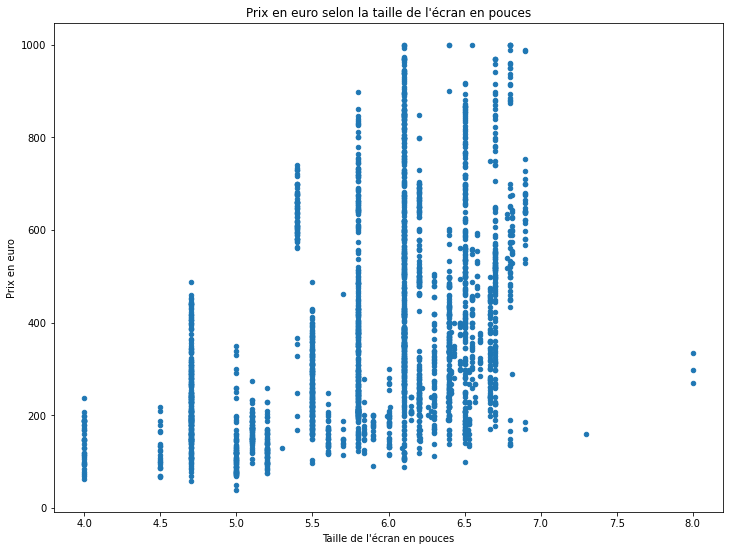

In [21]:
ecran_plot = data.plot.scatter(x="taille_ecran_pouce", y="prix_euro")
ecran_plot.set_xlabel("Taille de l'écran en pouces")
ecran_plot.set_ylabel("Prix en euro")
ecran_plot.set_title("Prix en euro selon la taille de l'écran en pouces");

À première vue, il semblerait qu'il y ait une relation croissante entre la taille de l'écran et le prix du smartphone.

## Capacité de stockage

In [22]:
round(data["capacite_stockage_Go"].describe(), 2)

count    2504.00
mean      130.40
std       109.41
min         4.00
25%        64.00
50%       128.00
75%       128.00
max       512.00
Name: capacite_stockage_Go, dtype: float64

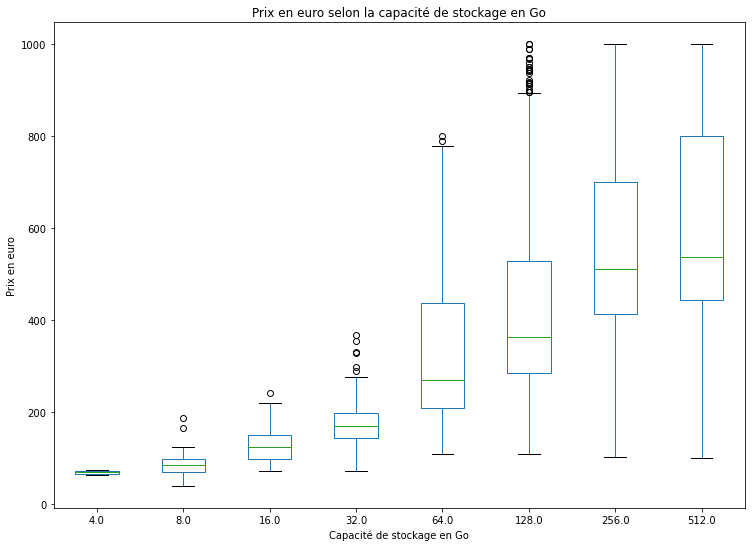

In [23]:
stockage_plot = data.boxplot(column="prix_euro", by="capacite_stockage_Go", grid=False)
stockage_plot.set_xlabel("Capacité de stockage en Go")
stockage_plot.set_ylabel("Prix en euro")
stockage_plot.set_title("Prix en euro selon la capacité de stockage en Go")
plt.suptitle("");

À première vue, les prix semblent croître à mesure que la capacité de stockage augmente. Cette croissance est encore plus élevée lorsque la capacité dépasse les 32 Go.

## Megapixels

In [25]:
data_megapixel = data.groupby("megapixel")
tableau_megapixel = data_megapixel["prix_euro"].agg([pd.Series.mean, pd.Series.std]).round(2)
tableau_megapixel.sort_values(by=["mean"], ascending=False).iloc[1:10,:]

,mean,std
megapixel,,
50,562.16,178.45
64,524.62,155.72
12/12/16,495.00,24.04
8/10/12/12/16,452.63,40.67
12,435.34,227.08
40,339.98,100.64
48,293.69,99.93
12/16,293.67,35.08
16,291.38,134.27


Il ne semble pas y avoir de relation à première vue.

## Système d'exploitation

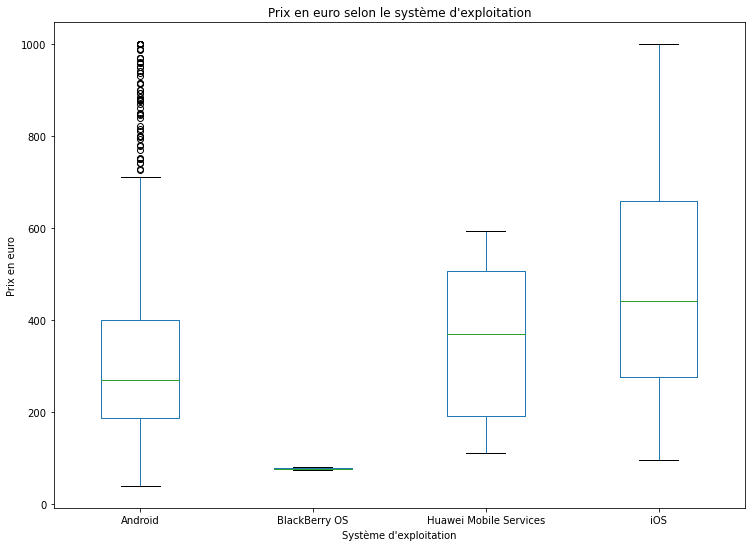

In [26]:
OS_plot = data.boxplot(column="prix_euro", by="systeme_exploitation", grid=False)
OS_plot.set_xlabel("Système d'exploitation")
OS_plot.set_ylabel("Prix en euro")
OS_plot.set_title("Prix en euro selon le système d'exploitation")
plt.suptitle("");

In [27]:
data_systeme_exploitation = data.groupby("systeme_exploitation")
tableau_systeme_exploitation = data_systeme_exploitation["prix_euro"].agg([pd.Series.mean, pd.Series.std]).round(2)
tableau_systeme_exploitation.sort_values(by=["mean"], ascending=False)

,mean,std
systeme_exploitation,,
iOS,475.99,230.56
Huawei Mobile Services,355.64,176.12
Android,320.38,186.06
BlackBerry OS,77.00,4.24


La dispersion semble la plus élevée sur les smartphones équipés de l'OS iOS. Les prix semblent également un peu plus élevé.

## Résolution de l'écran

In [28]:
data_resolution_ecran = data.groupby("resolution_ecran")
tableau_resolution_ecran = data_resolution_ecran["prix_euro"].agg([pd.Series.mean, pd.Series.std]).round(2)
tableau_resolution_ecran.sort_values(by=["mean"], ascending=False).iloc[1:10,:]

,mean,std
resolution_ecran,,
1440x3216,807.70,44.84
1170x2532,729.77,254.09
1242x2688,653.57,154.54
1644x3840,651.14,79.98
1440x3200,585.04,161.47
1080x2636,571.59,349.61
1125x2436,559.75,154.56
1440x3168,523.03,72.63
1200x2640,516.01,48.54


A priori il ne semblerait pas y avoir de relation.

## Réseau

In [29]:
data_reseau = data.groupby("reseau")
tableau_reseau = data_reseau["prix_euro"].agg([pd.Series.mean, pd.Series.std]).round(2)
tableau_reseau.sort_values(by=["mean"], ascending=False)

,mean,std
reseau,,
5G,611.80,219.25
4G,324.64,175.70
3G,96.38,83.76


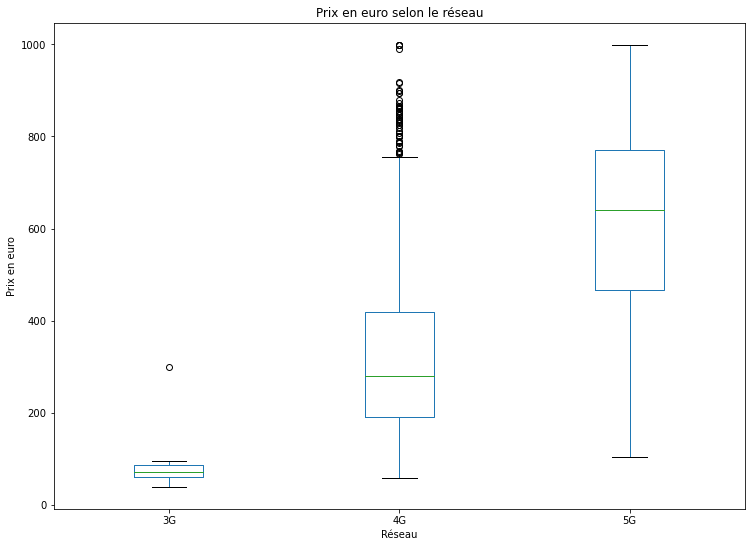

In [30]:
reseau_plot = data.boxplot(column="prix_euro", by="reseau", grid=False)
reseau_plot.set_xlabel("Réseau")
reseau_plot.set_ylabel("Prix en euro")
reseau_plot.set_title("Prix en euro selon le réseau")
plt.suptitle("");

Il semblerait qu'il y ait une relation croissante entre le réseau et le prix. Ceci peut être lié au fait que les téléphones 5G sont plus récents et donc potentiellement plus cher.

## Date de sortie

In [31]:
data_date_de_sortie = data.groupby("date_de_sortie")
tableau_date_de_sortie = data_date_de_sortie["prix_euro"].agg([pd.Series.mean, pd.Series.std]).round(2)
tableau_date_de_sortie.sort_values(by=["mean"], ascending=False)

,mean,std
date_de_sortie,,
2021,558.89,255.55
2020,530.42,224.66
2019,433.76,196.68
2018,322.48,133.52
2010,310.67,4.50
2017,231.99,96.43
2016,200.92,68.63
2015,165.22,48.68
2014,121.92,31.79


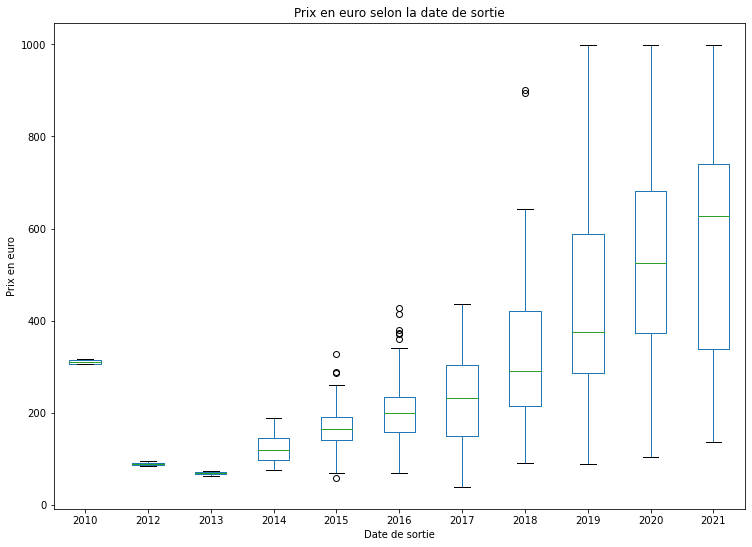

In [32]:
date_de_sortie_plot = data.boxplot(column="prix_euro", by="date_de_sortie", grid=False)
date_de_sortie_plot.set_xlabel("Date de sortie")
date_de_sortie_plot.set_ylabel("Prix en euro")
date_de_sortie_plot.set_title("Prix en euro selon la date de sortie")
plt.suptitle("");

Il semblerait que plus le téléphone est récent et plus son prix va être élevé. Cependant l'écart type est très élevé donc nous ne pouvons certainement rien en conclure.

## Mémoire

In [33]:
data_memoire = data.groupby("memoire")
tableau_memoire = data_memoire["prix_euro"].agg([pd.Series.mean, pd.Series.std]).round(2)
tableau_memoire.sort_values(by=["mean"], ascending=False)

,mean,std
memoire,,
12.000,597.55,197.19
8.000,466.38,163.03
4.000,447.64,236.26
6.000,356.36,209.13
3.000,290.50,120.72
2.000,178.26,62.32
15.000,116.73,34.07
1.000,103.57,37.34
1.500,78.50,12.03


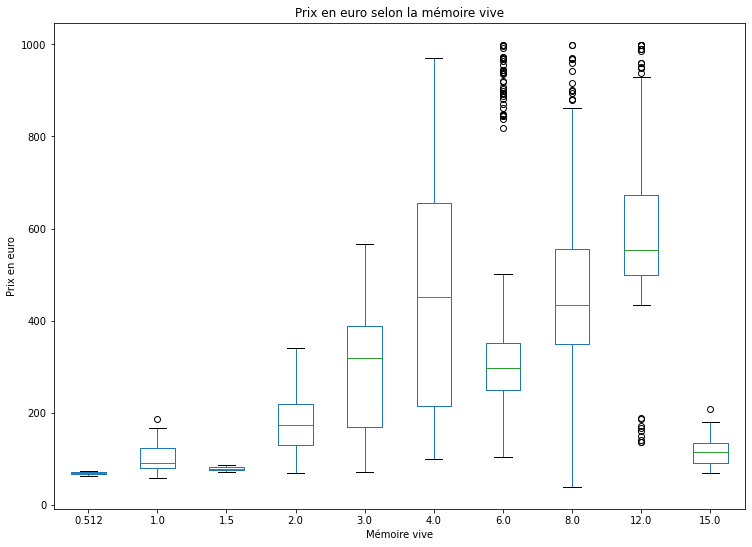

In [34]:
date_memoire = data.boxplot(column="prix_euro", by="memoire", grid=False)
date_memoire.set_xlabel("Mémoire vive")
date_memoire.set_ylabel("Prix en euro")
date_memoire.set_title("Prix en euro selon la mémoire vive")
plt.suptitle("");

Il ne semblerait pas y avoir de relation.

## Connecteur

In [35]:
data_connecteur = data.groupby("connecteur")
tableau_connecteur = data_connecteur["prix_euro"].agg([pd.Series.mean, pd.Series.std]).round(2)
tableau_connecteur.sort_values(by=["mean"], ascending=False)

,mean,std
connecteur,,
Lightning,519.38,213.62
USB-C,485.03,189.95
USB-C + Jack 3.5mm,280.70,122.30
micro USB,229.61,9.06
Lightning + Jack 3.5mm,175.45,43.50
micro USB + Jack 3.5mm,151.88,54.40


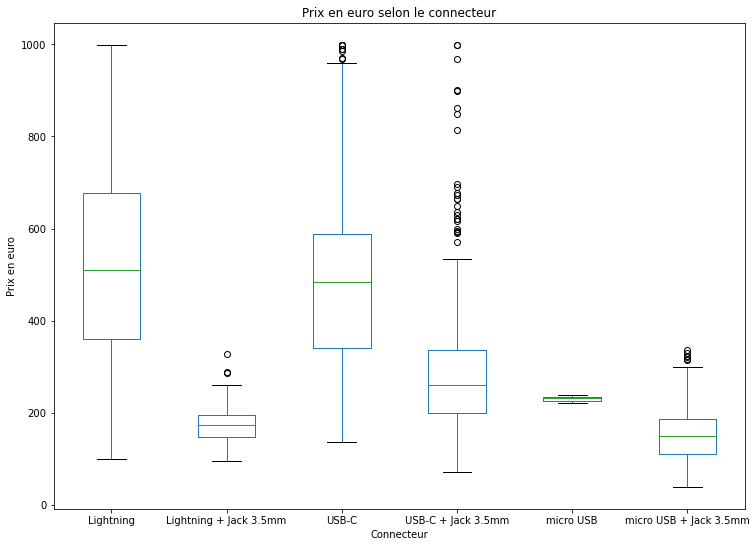

In [36]:
connecteur_plot = data.boxplot(column="prix_euro", by="connecteur", grid=False)
connecteur_plot.set_xlabel("Connecteur")
connecteur_plot.set_ylabel("Prix en euro")
connecteur_plot.set_title("Prix en euro selon le connecteur")
plt.suptitle("");

Les connecteurs lightning et USB-C semblent avoir les plus gros écart types et moyennes.

## Double sim

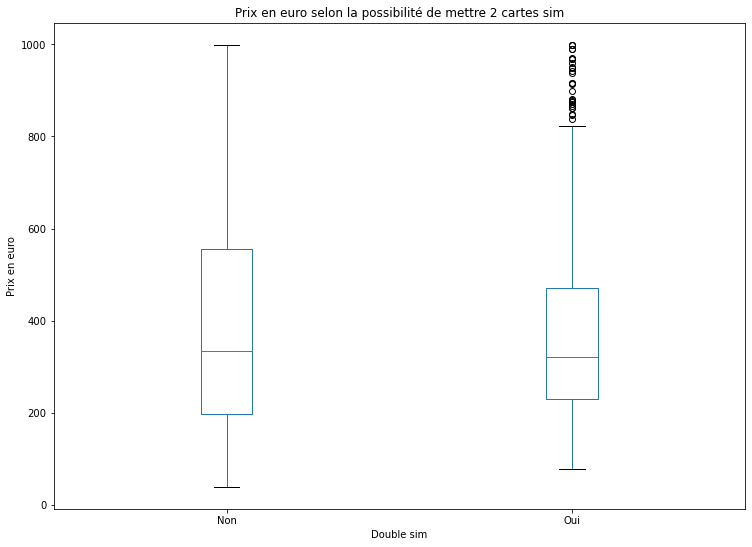

In [37]:
double_sim_plot = data.boxplot(column="prix_euro", by="double_sim", grid=False)
double_sim_plot.set_xlabel("Double sim")
double_sim_plot.set_ylabel("Prix en euro")
double_sim_plot.set_title("Prix en euro selon la possibilité de mettre 2 cartes sim")
plt.suptitle("");

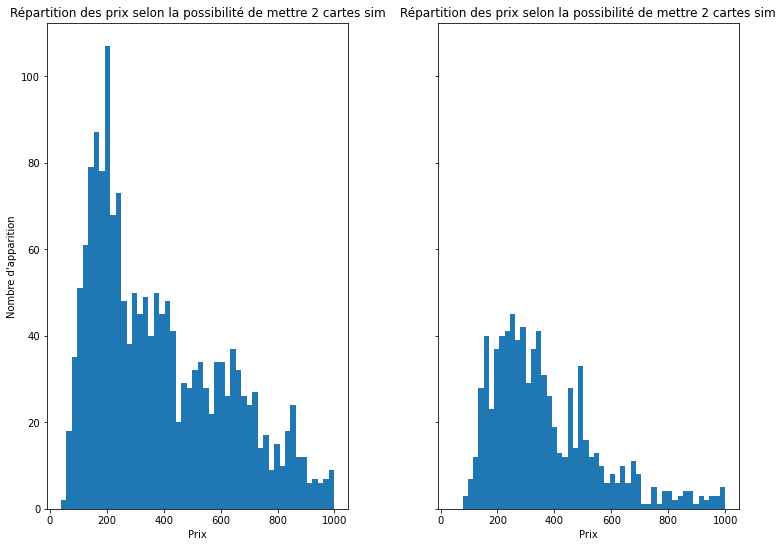

In [38]:
hist_double_sim = data.hist(
    column="prix_euro", by="double_sim", 
    bins=50, xrot=0, sharex=True, sharey=True
);
for ax in hist_double_sim.flatten():
    ax.set_xlabel("Prix")
    ax.set_ylabel("Nombre d'apparition")
    ax.set_title(
        "Répartition des prix selon la possibilité de mettre 2 cartes sim"
    )

Les répartitions semblent similaires.

## Port carte SD

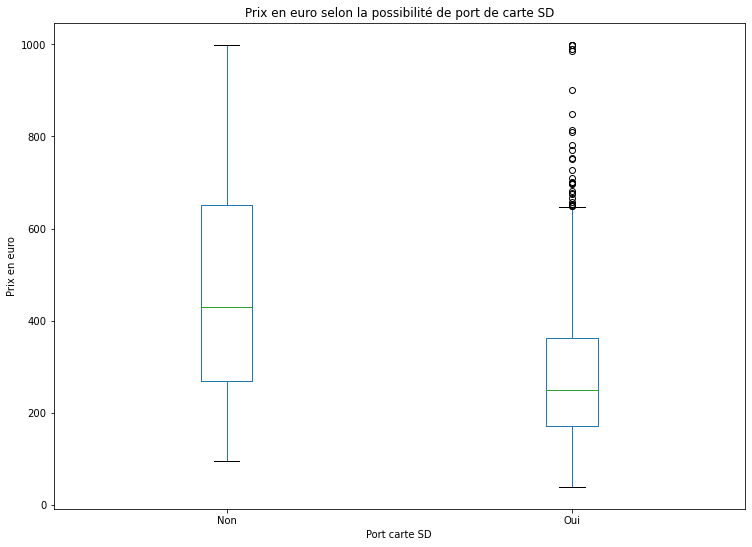

In [39]:
port_carte_SD_plot = data.boxplot(column="prix_euro", by="port_carte_SD", grid=False)
port_carte_SD_plot.set_xlabel("Port carte SD")
port_carte_SD_plot.set_ylabel("Prix en euro")
port_carte_SD_plot.set_title("Prix en euro selon la possibilité de port de carte SD")
plt.suptitle("");

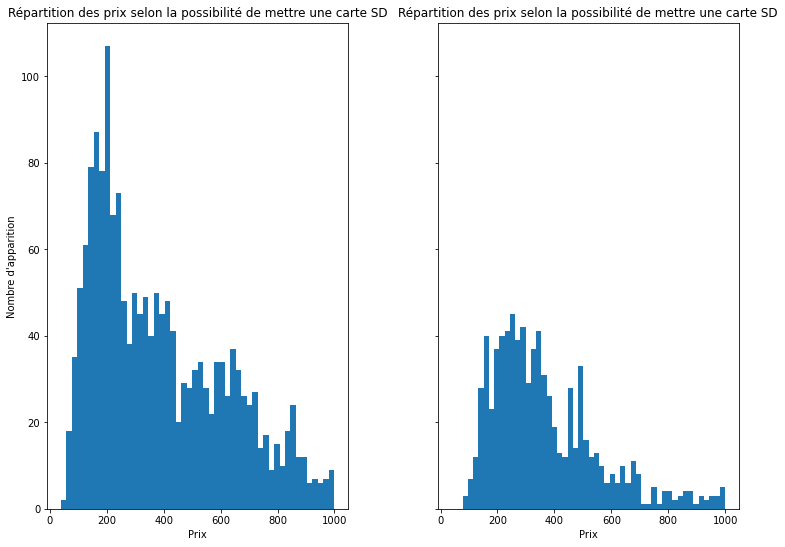

In [40]:
hist_port_carte_SD = data.hist(
    column="prix_euro", by="double_sim", 
    bins=50, xrot=0, sharex=True, sharey=True
);
for ax in hist_port_carte_SD.flatten():
    ax.set_xlabel("Prix")
    ax.set_ylabel("Nombre d'apparition")
    ax.set_title(
        "Répartition des prix selon la possibilité de mettre une carte SD"
    )

Il ne semble pas y avoir de relation.

## Pliable

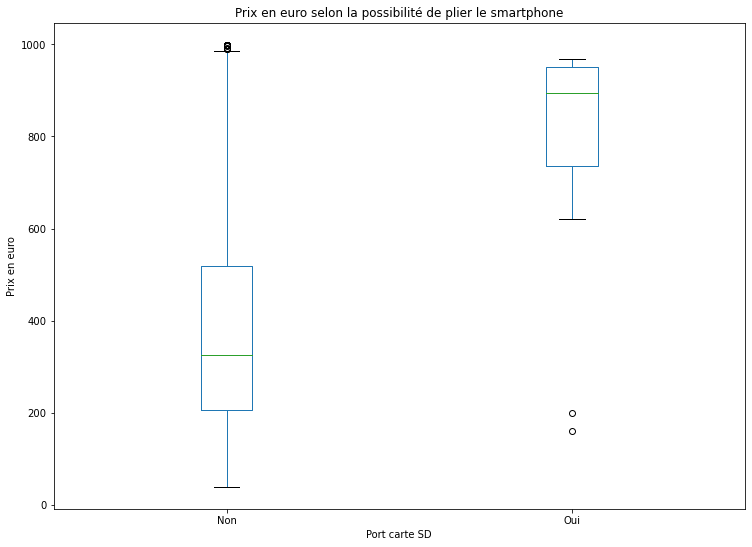

In [41]:
port_pliable = data.boxplot(column="prix_euro", by="pliable", grid=False)
port_pliable.set_xlabel("Port carte SD")
port_pliable.set_ylabel("Prix en euro")
port_pliable.set_title("Prix en euro selon la possibilité de plier le smartphone")
plt.suptitle("");

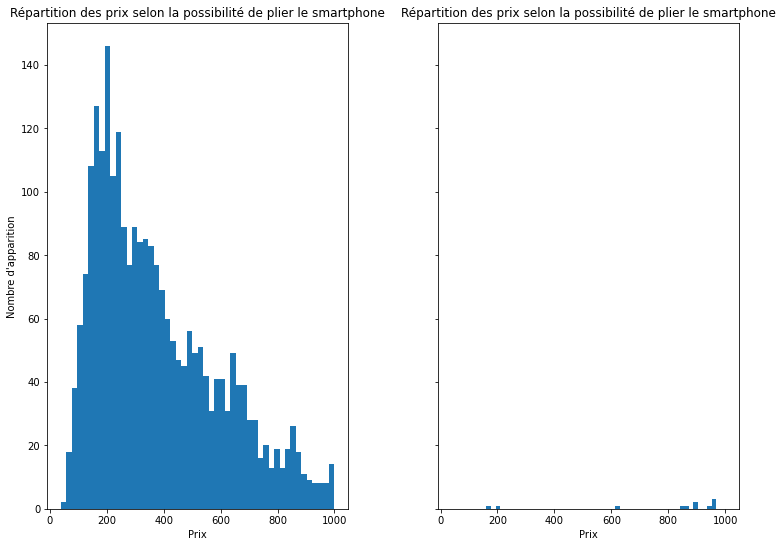

In [42]:
hist_pliable = data.hist(
    column="prix_euro", by="pliable", 
    bins=50, xrot=0, sharex=True, sharey=True
);
for ax in hist_pliable.flatten():
    ax.set_xlabel("Prix")
    ax.set_ylabel("Nombre d'apparition")
    ax.set_title(
        "Répartition des prix selon la possibilité de plier le smartphone"
    )

Il y a peu de téléphones pliables, cependant ces derniers sont soient très cher soit peu cher.

## Poids

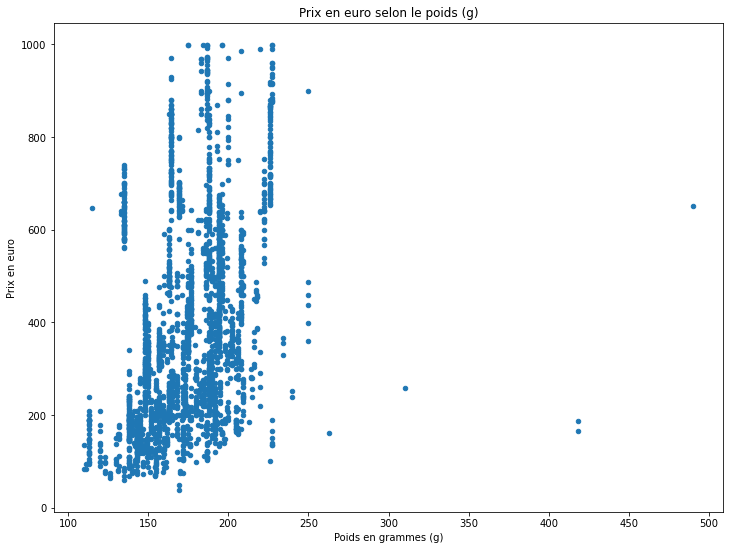

In [43]:
poids_plot = data.plot.scatter(x="poids_g", y="prix_euro")
poids_plot.set_xlabel("Poids en grammes (g)")
poids_plot.set_ylabel("Prix en euro")
poids_plot.set_title("Prix en euro selon le poids (g)");

Il semblerait y avoir une relation croissante lorsque le smartphone a un poids entre 100 et 250g. Les autres points sont plutôt isolés.